# 일원 분산 분석(One-way ANOVA)
일원 분산 분석(One-way ANOVA)은 세 개 이상의 독립된 그룹 간의 평균 차이가 통계적으로 유의미한지를 검정하는 방법입니다. 이 방법은 한 개의 범주형 독립변수(요인)에 따른 여러 집단의 종속변수 평균을 비교할 때 사용됩니다.

* 정규성: 각 그룹의 데이터가 정규분포를 따른다고 가정합니다.
* 등분산성 (Homogeneity of Variance): 각 그룹의 분산이 동일하다고 가정합니다.
* 독립성: 각 관측치는 서로 독립적이어야 합니다.

In [2]:
# 4종류의 비료를 사용한 식물의 성장에 대한 실험
# 식물 40개를 무작위로 10개씩 나누고, 화학 비료 A,B,C,D 를 일정 기간 사용한 후 성장량을 측정
# 성장의 차이가 있는지 유의수준 0.05 하에서 검정.

import pandas as pd

# 귀무가설: 네 가지 비료는 효과가 동일하다.
# 대립가설: 비료의 효과에는 차이가 있다. (적어도 두 가지 비료의 효과에는 차이가 있다.)

df = pd.DataFrame({
    'A': [10.5, 11.3, 10.8, 9.6, 11.1, 10.2, 10.9, 11.4, 10.5, 10.3],
    'B': [11.9, 12.4, 12.1, 13.2, 12.5, 11.8, 12.2, 12.9, 12.4, 12.3],
    'C': [11.2, 11.7, 11.6, 10.9, 11.3, 11.1, 10.8, 11.5, 11.4, 11.0],
    'D': [9.8, 9.4, 9.1, 9.5, 9.6, 9.9, 9.2, 9.7, 9.3, 9.4]
})

df.head()

,A,B,C,D
0,10.5,11.9,11.2,9.8
1,11.3,12.4,11.7,9.4
2,10.8,12.1,11.6,9.1
3,9.6,13.2,10.9,9.5
4,11.1,12.5,11.3,9.6


In [4]:
import scipy.stats as stats

print("=== 정규성 검정 ===")
print(stats.shapiro(df['A']))
print(stats.shapiro(df['B']))
print(stats.shapiro(df['C']))
print(stats.shapiro(df['D']))

=== 정규성 검정 ===
ShapiroResult(statistic=0.9649054066073813, pvalue=0.8400161543468654)
ShapiroResult(statistic=0.9468040874196029, pvalue=0.6308700692815115)
ShapiroResult(statistic=0.9701646110856055, pvalue=0.892367306190296)
ShapiroResult(statistic=0.9752339025839644, pvalue=0.9346854448707653)


In [5]:
print("=== 등분산 검정 ===")
print(stats.levene(df['A'], df['B'], df['C'], df['D']))

=== 등분산 검정 ===
LeveneResult(statistic=1.9355354288758708, pvalue=0.14127835331346628)


In [6]:
print("=== 일원 분산 분석 ===")
print(stats.f_oneway(df['A'], df['B'], df['C'], df['D'])) # 차이가 있다고 추론!

# 그룹 간의 평균 차이가 그룹 내의 변동에 비해 89.126배 정도 크다는 것을 의미합니다. 
# 이 값과 함께 p-값이 매우 작게 나왔으므로(1.001838152252373e-16), 
# 이는 귀무가설(모든 그룹의 평균이 같다)을 기각할 충분한 증거가 있다는 것을 의미

=== 일원 분산 분석 ===
F_onewayResult(statistic=89.12613851177174, pvalue=1.001838152252373e-16)


In [7]:
df2 = pd.melt(df)
df2.head()

,variable,value
0,A,10.5
1,A,11.3
2,A,10.8
3,A,9.6
4,A,11.1


In [10]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# 3. 일원 분산 분석 (One-way ANOVA)
model = ols('value ~ C(variable)', data=df2).fit()

anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(variable),3.0,43.21875,14.406250,89.126139,1.001838e-16
Residual,36.0,5.81900,0.161639,NaN,NaN


In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# ANOVA 결과가 유의미하면 사후 분석(Tukey HSD) 진행
tukey = pairwise_tukeyhsd(endog=df2['value'], groups=df2['variable'], alpha=0.05)
print("Tukey HSD 결과")
print(tukey)

Tukey HSD 결과
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     1.71    0.0  1.2258  2.1942   True
     A      C     0.59 0.0118  0.1058  1.0742   True
     A      D    -1.17    0.0 -1.6542 -0.6858   True
     B      C    -1.12    0.0 -1.6042 -0.6358   True
     B      D    -2.88    0.0 -3.3642 -2.3958   True
     C      D    -1.76    0.0 -2.2442 -1.2758   True
----------------------------------------------------


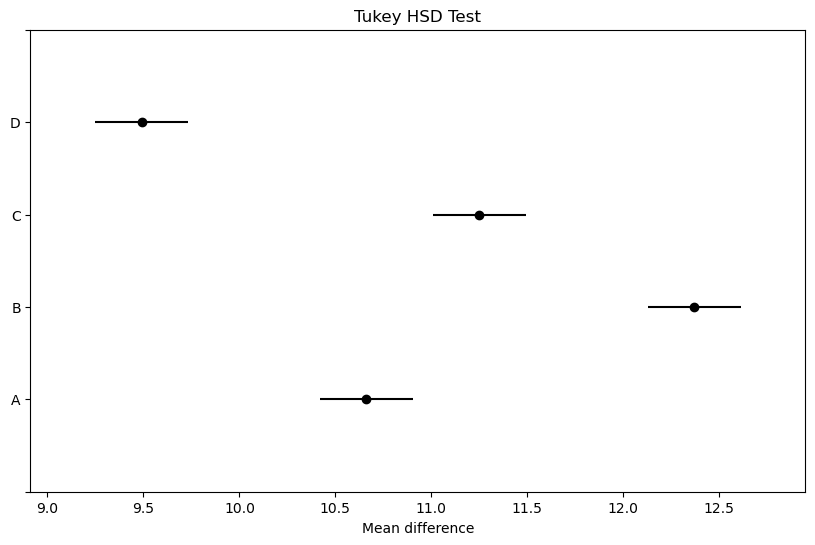

In [21]:
# Tukey HSD 결과 시각화
tukey.plot_simultaneous()
plt.title("Tukey HSD Test")
plt.xlabel("Mean difference")
plt.show()

* 만약 정규성을 따르지 않으면?

In [11]:
# 정규성을 만족하지 않는다고 판단되면, Kruskal-Wallis 검정 수행(세 개 이상의 독립 그룹 간 중앙값 차이가 통계적으로 유의미한지를 검정)
kw_statistic, kw_p_value = stats.kruskal(df['A'], df['B'], df['C'], df['D'])
kw_statistic, kw_p_value

(33.91729415078395, 2.0624565034628142e-07)

In [12]:
# 만약 등분산성을 만족하지 않는다면, 올바른 결과를 기대하기가 어려움.

## 연습문제
한 연구자가 세 가지 다른 교육 방법(교육 방법 A, 교육 방법 B, 교육 방법 C)이 학생들의 시험 점수에 미치는 영향을 알아보고자 하였습니다. 각 교육 방법을 적용받은 학생들의 시험 점수가 아래와 같이 주어졌다고 가정합니다.

In [23]:
A = [70, 72, 68, 74, 69, 73, 70, 71, 72, 70]
B = [75, 78, 74, 77, 76, 80, 79, 75, 78, 77]
C = [82, 85, 80, 83, 81, 84, 86, 82, 83, 85]

In [24]:
print("=== 정규성 검정 ===")
print(stats.shapiro(A))
print(stats.shapiro(B))
print(stats.shapiro(C))

=== 정규성 검정 ===
ShapiroResult(statistic=0.9692121326757147, pvalue=0.8834456534794826)
ShapiroResult(statistic=0.9691888544165497, pvalue=0.8832241960495848)
ShapiroResult(statistic=0.9691888544165495, pvalue=0.8832241960495825)


In [25]:
print("=== 등분산 검정 ===")
print(stats.levene(A,B,C))

=== 등분산 검정 ===
LeveneResult(statistic=0.0, pvalue=1.0)


In [26]:
print("=== 일원 분산 분석 ===")
print(stats.f_oneway(A,B,C)) # 교육 방법에 차이가 존재한다!

=== 일원 분산 분석 ===
F_onewayResult(statistic=103.90486039296802, pvalue=2.083261762272435e-13)


In [29]:
df = pd.DataFrame({'A' : A, 'B' : B, 'C' : C})
df2 = pd.melt(df)

tukey = pairwise_tukeyhsd(endog=df2['value'], groups=df2['variable'], alpha=0.05)
print("Tukey HSD 결과")
print(tukey)

Tukey HSD 결과
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B      6.0   0.0  3.9016  8.0984   True
     A      C     12.2   0.0 10.1016 14.2984   True
     B      C      6.2   0.0  4.1016  8.2984   True
---------------------------------------------------
